# What Is Multicollinearity and Why Should I Care?
n regression, "multicollinearity" refers to predictors that are correlated with other predictors.  Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other. In other words, it results when you have factors that are a bit redundant.

You can think about it in terms of a football game: If one player tackles the opposing quarterback, it's easy to give credit for the sack where credit's due. But if three players are tackling the quarterback simultaneously, it's much more difficult to determine which of the three makes the biggest contribution to the sack. 

Not that into football?  All right, try this analogy instead: You go to see a rock and roll band with two great guitar players. You're eager to see which one plays best. But on stage, they're both playing furious leads at the same time!  When they're both playing loud and fast, how can you tell which guitarist has the biggest effect on the sound?  Even though they aren't playing the same notes, what they're doing is so similar it's difficult to tell one from the other. 

That's the problem with multicollinearity. 

Multicollinearity increases the standard errors of the coefficients. Increased standard errors in turn means that coefficients for some independent variables may be found not to be significantly different from 0. In other words, by overinflating the standard errors, multicollinearity makes some variables statistically insignificant when they should be significant. Without multicollinearity (and thus, with lower standard errors), those coefficients might be significant.

# Warning Signs of Multicollinearity 
A little bit of multicollinearity isn't necessarily a huge problem: extending the rock band analogy, if one guitar player is louder than the other, you can easily tell them apart. But severe multicollinearity is a major problem, because it increases the variance of the regression coefficients, making them unstable. The more variance they have, the more difficult it is to interpret the coefficients.

So, how do you know if you need to be concerned about multicollinearity in your regression model? Here are some things to watch for:

A regression coefficient is not significant even though, theoretically, that variable should be highly correlated with Y.
When you add or delete an X variable, the regression coefficients change dramatically.
You see a negative regression coefficient when your response should increase along with X.
You see a positive regression coefficient when the response should decrease as X increases.
Your X variables have high pairwise correlations. 
One way to measure multicollinearity is the variance inflation factor (VIF), which assesses how much the variance of an estimated regression coefficient increases if your predictors are correlated.  If no factors are correlated, the VIFs will all be 1.



# How Can I Deal With Multicollinearity? 
If multicollinearity is a problem in your model -- if the VIF for a factor is near or above 5 -- the solution may be relatively simple. Try one of these: 

Remove highly correlated predictors from the model.  If you have two or more factors with a high VIF, remove one from the model. Because they supply redundant information, removing one of the correlated factors usually doesn't drastically reduce the R-squared.  Consider using stepwise regression, best subsets regression, or specialized knowledge of the data set to remove these variables. Select the model that has the highest R-squared value. 
 
Use Partial Least Squares Regression (PLS) or Principal Components Analysis, regression methods that cut the number of predictors to a smaller set of uncorrelated components.
With Minitab Statistical Software, it's easy to use the tools available in Stat > Regression menu to quickly test different regression models to find the best one.

https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

In [ ]:
df=pd.read_csv(r'C:/Users/Dell/Desktop/salary.csv')
df.head()

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# Fixing Multicollinearity

In [ ]:
# Dropping one of the correlated features will help in bringing down 
# the multicollinearity between correlated features:
X = df.iloc[:,:-1]
calc_vif(X)

In [ ]:
df2 = df.copy()
df2['Age_at_joining'] = df.apply(lambda x: x['Age'] - x['Years of service'],axis=1)
X = df2.drop(['Age','Years of service','Salary'],axis=1)
calc_vif(X)

# next example

In [3]:
import pandas as pd  
  
# the dataset 
data = pd.read_csv('./data/BMI.csv') 
  
# printing first few rows 
print(data.head())

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# creating dummies for gender 
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1}) 
  
# the independent variables set 
X = data[['Gender', 'Height', 'Weight']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

  feature        VIF
0  Gender   2.028864
1  Height  11.623103
2  Weight  10.688377


As we can see, height and weight have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the height of a person does influence their weight. Hence, considering these two features together leads to a model with high multicollinearity.

Multicollinearity occurs when multiple features in a regression model are correlated or dependent on each other to some extent. Change in the value of one feature will also force change the value of features collinear to it. In other words, such features add no more information to the model.🔂

They, in fact, can lead to Overfitting as it might give unpredictable results on unseen data. This is turn means a high Standard Error and low Statistical Power.💡

To measure Multicollinearity, the 2 most common techniques are - Correlation Matrix and Variance Inflation Factor(VIF). Correlation Matrix just contains the correlation values of each feature with every other feature. Extreme values signify high correlation. 🔢

VIF is another method to quantify correlation, with value of 1 meaning no Collinearity and >5 meaning high collinearity.

Multicollinear variables with correlation more than a threshold are usually dropped from the dataset. This reduces the dimensions and makes the model less complex. There are many more techniques to deal with Multicollinearity such as Linear combination of the features, PCA, etc.🛠️

How do you deal with MultiCollinearity?



In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import warnings
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train_2017.csv', parse_dates=["transactiondate"])
properties = pd.read_csv('./data/properties_2017.csv')

In [3]:
print ("Train dataset shape: ",train.shape)
print ("Properties dataset shape: ",properties.shape)

Train dataset shape:  (77613, 3)
Properties dataset shape:  (2985217, 58)


In [4]:
#Merge Train And Properties To Facilitate EDA
merged = pd.merge(train,properties,on="parcelid",how="left")

In [5]:
merged.head(3).transpose()

,0,1,2
parcelid,14297519,17052889,14186244
logerror,0.0255949,0.0556191,0.00538285
transactiondate,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00
airconditioningtypeid,NaN,NaN,NaN
architecturalstyletypeid,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN
bathroomcnt,3.5,1,2
bedroomcnt,4,2,3
buildingclasstypeid,NaN,NaN,NaN
buildingqualitytypeid,NaN,NaN,NaN


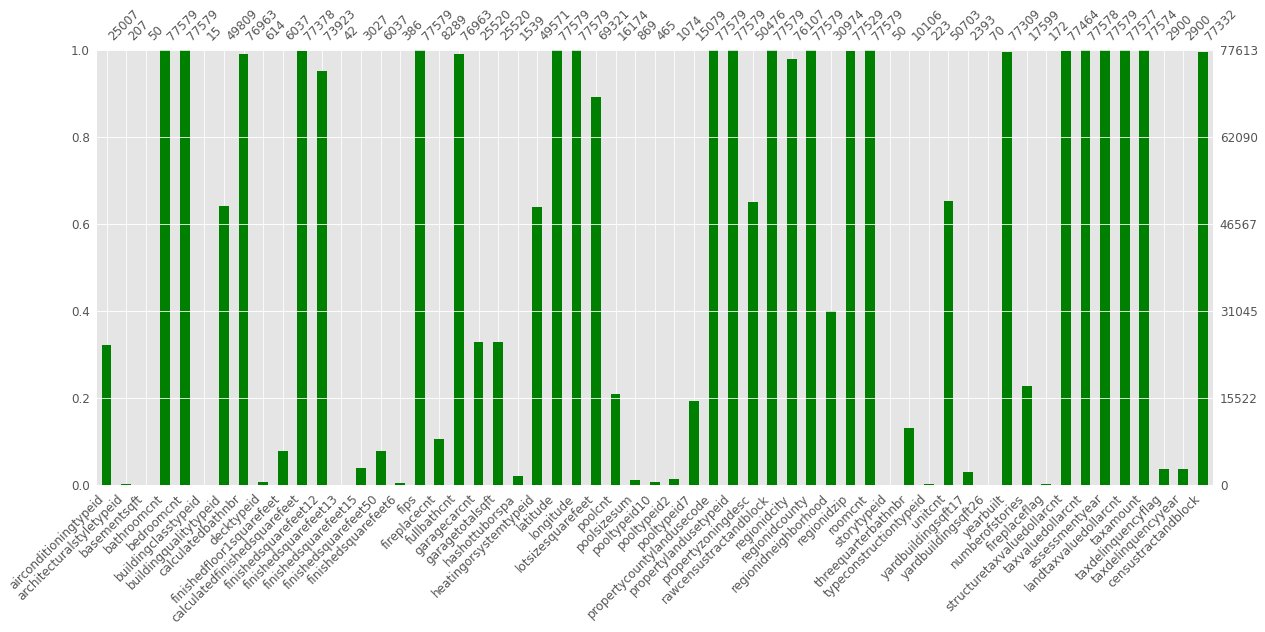

In [7]:
missingValueColumns = merged.columns[merged.isnull().any()].tolist()
msno.bar(merged[missingValueColumns],\
            figsize=(20,8),color="green",fontsize=12,labels=True,)

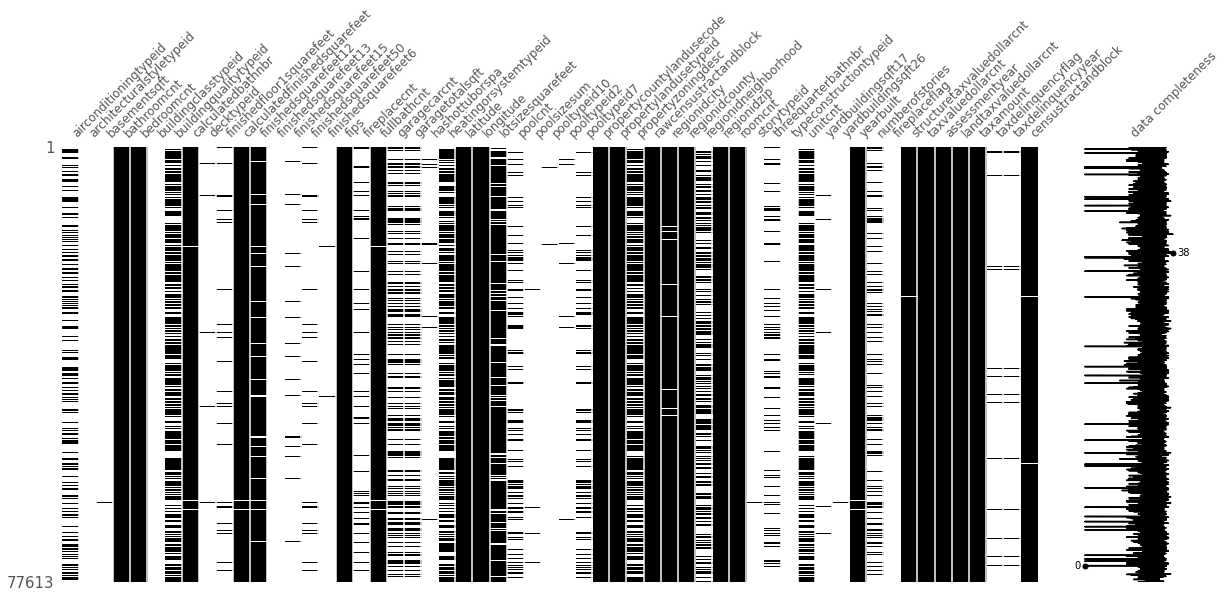

In [8]:
msno.matrix(merged[missingValueColumns],width_ratios=(10,1),\
            figsize=(20,8),color=(0,0, 0),fontsize=12,sparkline=True,labels=True)

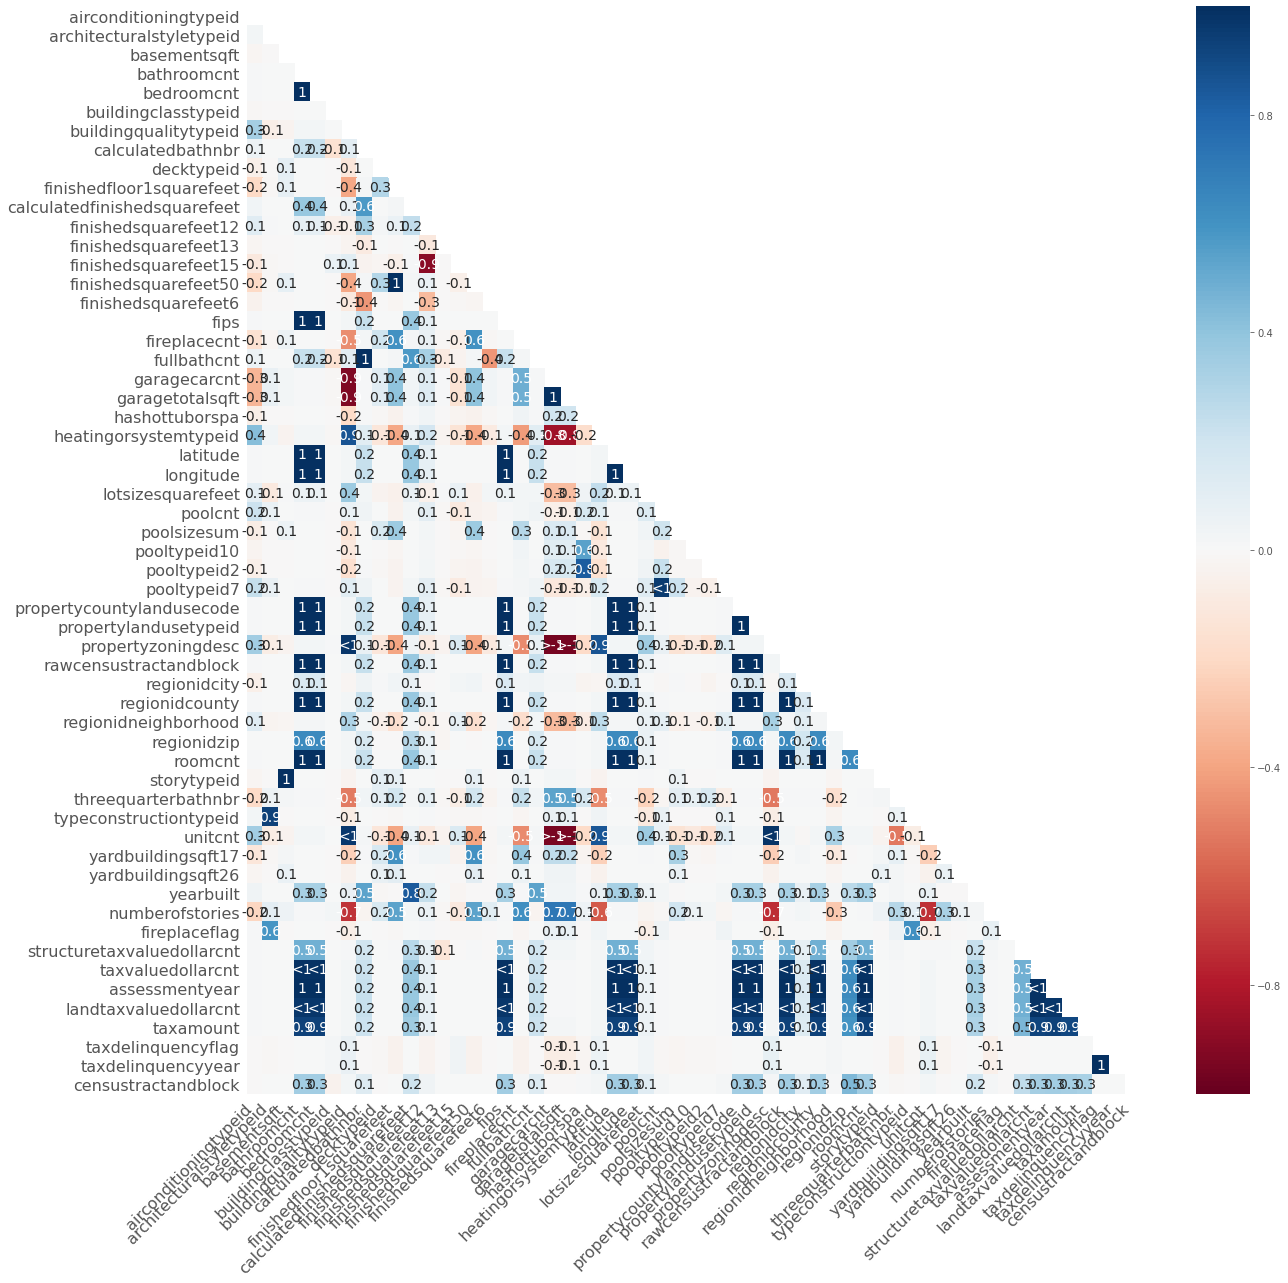

In [9]:
msno.heatmap(merged[missingValueColumns],figsize=(20,20))

[Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'VIF Scores'),
 Text(0.5, 1.0, 'Variables Which Exhibit Multicollinearity')]

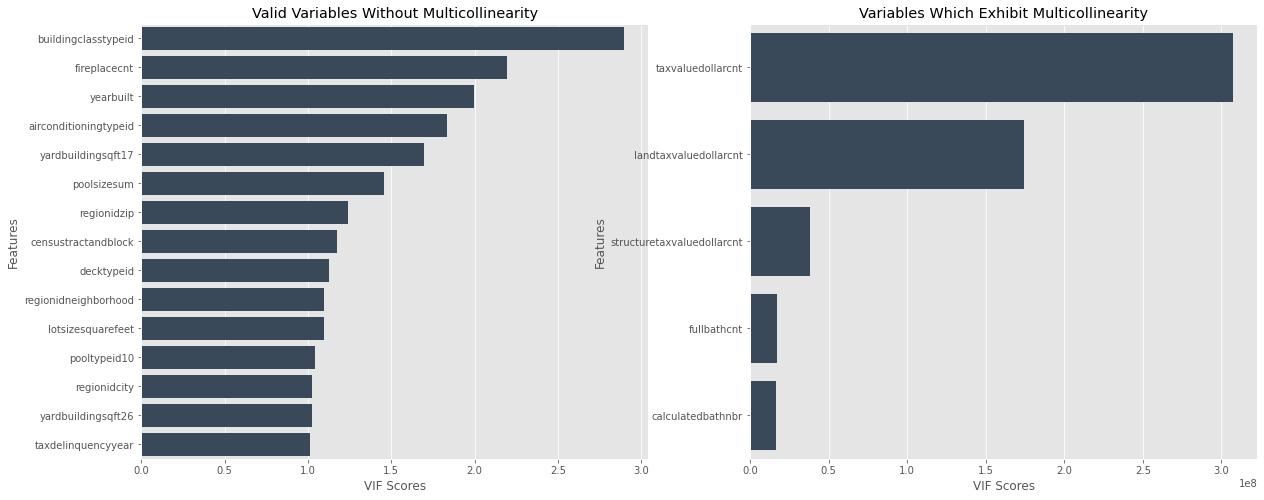

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
warnings.filterwarnings("ignore")

def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif


numericalCol = []
for f in merged.columns:
    #print (f)
    if merged[f].dtype!='object' and f not in ["parcelid", "transactiondate", "logerror"]:
        numericalCol.append(f)
mergedFilterd = merged[numericalCol].fillna(-999)
vifDict = calculate_vif_(mergedFilterd)

vifDf = pd.DataFrame()
vifDf['variables'] = vifDict.keys()
vifDf['vifScore'] = vifDict.values()
vifDf.sort_values(by=['vifScore'],ascending=False,inplace=True)
validVariables = vifDf[vifDf["vifScore"]<=5]
variablesWithMC  = vifDf[vifDf["vifScore"]>5]

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,8)
sn.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1,orient="h",color="#34495e")
sn.barplot(data=variablesWithMC.head(5),x="vifScore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")